In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4329.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4223.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4253.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4190.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4354.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4136.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4226.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4214.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4888.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4170.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4323.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4262.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4788.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4657.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4387.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4255.jpg
/kaggle/

In [2]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import cv2
import matplotlib.pyplot as plt

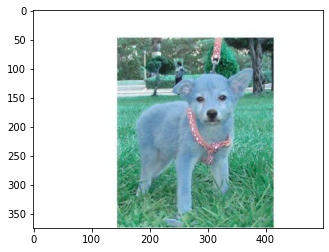

In [3]:
plt.imshow(cv2.imread("/kaggle/input/cat-and-dog/training_set/training_set/dogs/dog.1599.jpg"))

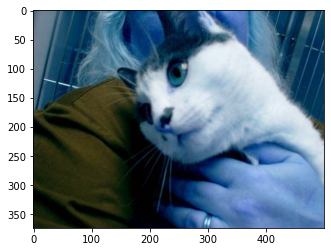

In [4]:
plt.imshow(cv2.imread("/kaggle/input/cat-and-dog/training_set/training_set/cats/cat.2245.jpg"))

**PART-1 DATA PREPROCESSING**

****preprocessing the training set****

In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/kaggle/input/cat-and-dog/training_set/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8005 images belonging to 2 classes.


**preprocessing the test set**

In [6]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/kaggle/input/cat-and-dog/test_set/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2023 images belonging to 2 classes.


**Part 2 - Building the CNN**

**Initialising the CNN**

In [7]:
cnn = tf.keras.models.Sequential()

**Step 1 - Convolution**

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

**Step 2 - Pooling**

In [9]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

**Adding a second convolutional layer**

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

**Step 3 - Flattening**

In [11]:
cnn.add(tf.keras.layers.Flatten())

**Step 4 - Full Connection**

In [12]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

**Step 5 - Output Layer**

In [13]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

**Part 3 - Training the CNN**

**Compiling the CNN**

In [14]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

**Training the CNN on the Training set and evaluating it on the Test set**

In [15]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
251/251 [==============================] - 74s 282ms/step - loss: 0.6934 - accuracy: 0.5275 - val_loss: 0.6583 - val_accuracy: 0.5996
Epoch 2/25
251/251 [==============================] - 33s 132ms/step - loss: 0.6224 - accuracy: 0.6590 - val_loss: 0.5895 - val_accuracy: 0.6911
Epoch 3/25
251/251 [==============================] - 33s 131ms/step - loss: 0.5753 - accuracy: 0.7120 - val_loss: 0.5281 - val_accuracy: 0.7519
Epoch 4/25
251/251 [==============================] - 33s 133ms/step - loss: 0.5151 - accuracy: 0.7415 - val_loss: 0.5621 - val_accuracy: 0.6995
Epoch 5/25
251/251 [==============================] - 34s 134ms/step - loss: 0.5289 - accuracy: 0.7314 - val_loss: 0.5188 - val_accuracy: 0.7598
Epoch 6/25
251/251 [==============================] - 33s 133ms/step - loss: 0.4875 - accuracy: 0.7534 - val_loss: 0.5140 - val_accuracy: 0.7484
Epoch 7/25
251/251 [==============================] - 33s 133ms/step - loss: 0.4800 - accuracy: 0.7718 - val_loss: 0.4686 - val_ac

**Part 4 - Making a single prediction**

In [16]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4226.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

In [17]:
print(prediction)

dog
